In [1]:
# allows update of external libraries without need to reload package
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import pickle
import matplotlib.pyplot as plt
import pickle
import pathlib
import numpy as np
import warnings

import sklearn.metrics
import scipy.stats

LIBRARY_PATH = "/p/home/jusers/ehlert1/juwels/a2/src/"
sys.path.append(LIBRARY_PATH)
import a2.plotting

In [3]:
FOLDER_RESULTS = pathlib.Path("../Result/Task4/electra_base-fl/")

In [4]:
def load_pickle(filename):
    with open(filename, "rb") as input_file:
        return pickle.load(input_file)

In [5]:
truths, probabilities = load_pickle(FOLDER_RESULTS / "result_prob.pkl")

In [6]:
probabilities.keys()

dict_keys([('test_in', 'Vanilla'), ('test_out', 'Vanilla'), ('test_in', 'Temp Scaling'), ('test_out', 'Temp Scaling'), ('test_in', 'MC Dropout'), ('test_out', 'MC Dropout')])

/p/home/jusers/ehlert1/juwels/a2/src/a2/plotting/histograms.py:328: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


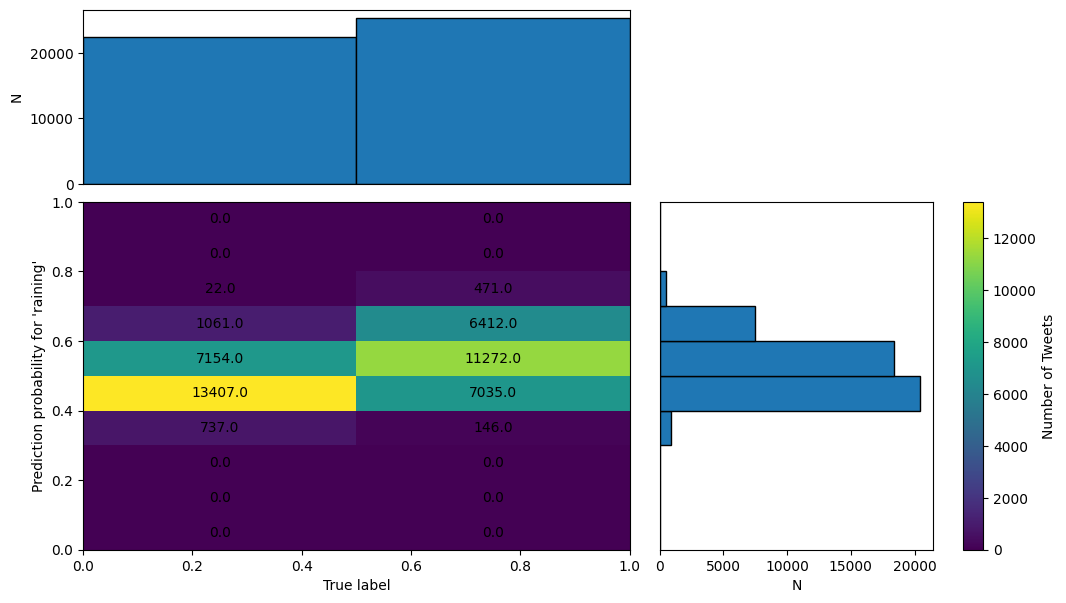

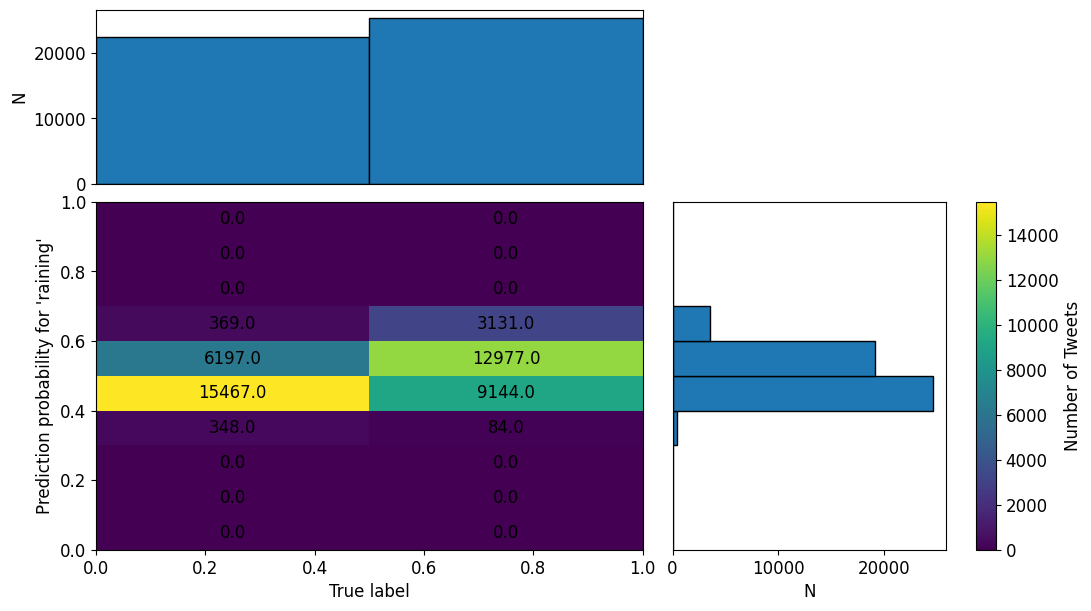

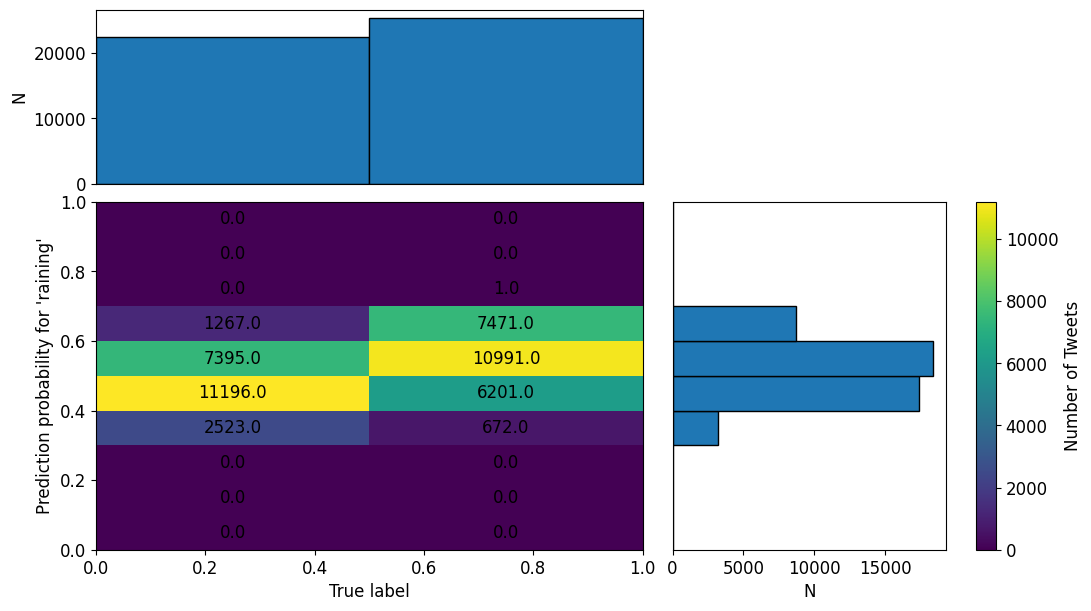

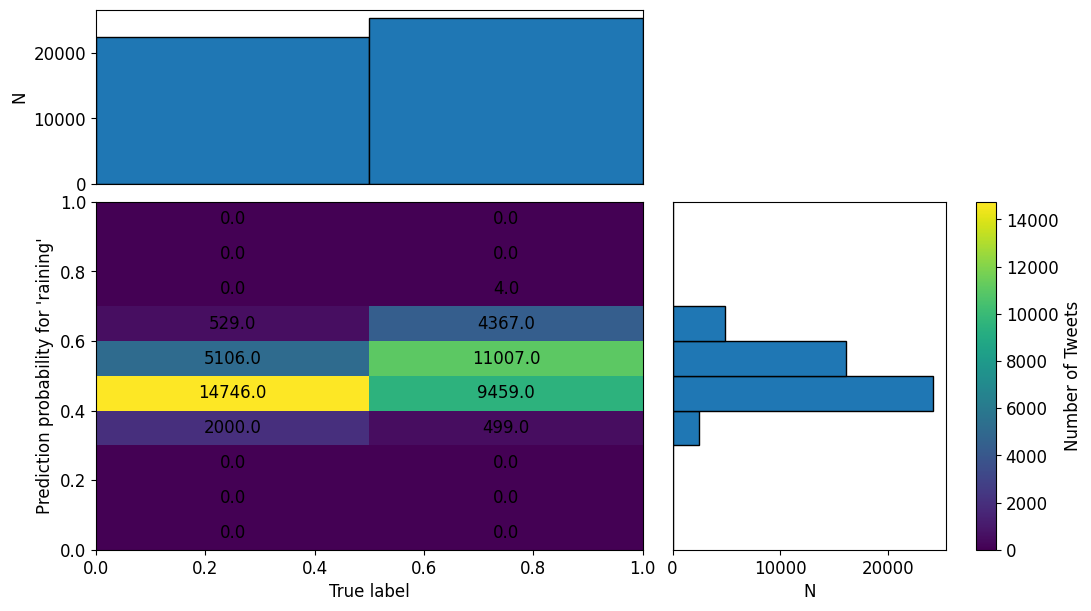

In [7]:
truth = truths['test_in']
for seed in range(4):
    probs = probabilities[('test_in', 'MC Dropout')][seed]
    a2.plotting.analysis.plot_prediction_certainty(truth, probs[:,1], ylim=[0,1])

In [44]:
DATA_FOLDER = pathlib.Path("/p/scratch/deepacf/maelstrom/maelstrom_data/ap2/data/UQ-PLM/Task4/Original/")

def load_trainings_data(filename):
    tweets = load_pickle(filename)
    tweets, labels = np.array(tweets).T
    tweets = np.array(tweets, dtype=str)
    labels = np.array(labels, dtype=float)
    labels = np.array(labels, dtype=int)
    return tweets, labels

In [45]:
tweets, labels = load_trainings_data(DATA_FOLDER / "test_in.pkl")

In [59]:
mask = np.logical_and.reduce((probs[:, 1] > 0.45, probs[:, 1] < 0.55, truth == 1))
tweets[mask]

array(['Under a puddle, I stopped in the snow for this one. Corner of Cornwall Road and Theed St. Waterloo, London. Not quite sure why it has the letter LBC when this is in Waterloo.',
       'Call me a weirdo or a misfit if you like, but how about spending the money on a National scheme of flood prevention instead.',
       'It is getting rammed where the sun do not shine. Your shout. Numbers or? With or without KY jelly?',
       ...,
       'We have got a limited edition suede caps beautifully embroidered, superb quality to protect you from the sun. Theyll be soon on the online shop but you can already PM us if interested. en London, United Kingdom',
       'Whenever the sun is shining I always know where Ted will be',
       '. snowstorm, by Turner obviously'], dtype='<U1141')